# Pandas Solution

Create a DataFrame by reading file *../../assets/data/Changi_daily_rainfall.csv*. Perform the following two tasks with this DataFrame:

## Task 1
1. Determine whether the dataframe contains `NaN` values, and if so, populates the `NaN` values with 0.
2. View the first 2 rows and the tail 2 rows, and check total length of data.
3. Display a summary of the characteristics of the dataframe
4. Calculate the number of days with daily rainfall exceeding 50mm.

Hint: If you complete this task in your local computer (not recommend), please modify the file path accordingly.

In [1]:
#1
import pandas as pd
df = pd.read_csv('../../assets/data/Changi_daily_rainfall.csv', index_col=0, parse_dates=True)
df.isnull().sum().values[0] # no NaN value

0

In [2]:
# 2
print('the first 2 rows:\n', df.head(2))
print('the tail 2 rows:\n', df.tail(2))
print('total length of data:\n',df.shape[0])

the first 2 rows:
             Daily Rainfall Total (mm)
Date                                 
1981-01-01                        0.0
1981-01-02                        0.0
the tail 2 rows:
             Daily Rainfall Total (mm)
Date                                 
2020-12-30                        0.0
2020-12-31                        0.0
total length of data:
 14610


In [3]:
# 3
df.describe()

,Daily Rainfall Total (mm)
count,14610.000000
mean,5.721629
std,14.194586
min,0.000000
25%,0.000000
50%,0.000000
75%,4.200000
max,216.200000


In [4]:
# 4
df[df['Daily Rainfall Total (mm)']>50].shape[0]

284

## Task 2
1. Upsample the DataFrame into 1-year bins and sum the values of the timestamps falling into a bin.
2. Calculate the average value of yearly rainfall in 1981-2000 and 2001-2020 and compare them.
3. Calculate the year with the largest annual rainfall and corresponding value, and the year with the smallest annual rainfall and corresponding value.
4. Make a line plot of data generated in step 1 (Optional)

In [5]:
# 1
df_year = df.resample('y').sum()
df_year.head(5)

,Daily Rainfall Total (mm)
Date,
1981-12-31,1336.3
1982-12-31,1581.7
1983-12-31,1866.5
1984-12-31,2686.7
1985-12-31,1483.9


In [6]:
# 2 
print('the average value of yearly rainfall in 1981-2000:\n', df_year['1981':'2000'].mean().values[0])
print('the average value of yearly rainfall in 2001-2020:\n', df_year['2001':'2020'].mean().values[0])
# the average value of yearly rainfall in 2001-2020 is greater than 1981-2000

the average value of yearly rainfall in 1981-2000:
 2071.555
the average value of yearly rainfall in 2001-2020:
 2108.0950000000003


In [7]:
# 3
print('the largest annual rainfall and corresponding value:\n', df_year[df_year['Daily Rainfall Total (mm)']==df_year.max().values[0]])
print('the smallest annual rainfall and corresponding value:\n', df_year[df_year['Daily Rainfall Total (mm)']==df_year.min().values[0]])

the largest annual rainfall and corresponding value:
             Daily Rainfall Total (mm)
Date                                 
2007-12-31                     2886.2
the smallest annual rainfall and corresponding value:
             Daily Rainfall Total (mm)
Date                                 
1997-12-31                     1118.9


<AxesSubplot:xlabel='Date'>

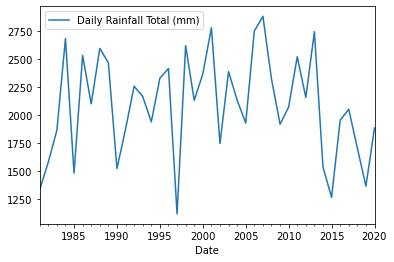

In [8]:
df_year.plot()